In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
term_data = pd.read_csv('term-deposit-marketing-2020.csv')
term_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'term-deposit-marketing-2020.csv'

In [7]:
term_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [8]:
term_data['month'].value_counts()

month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64

In [9]:
term_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [10]:
numeric_features_original = term_data.select_dtypes(include=[np.number])
categorical_features_original = term_data.select_dtypes(exclude=[np.number])

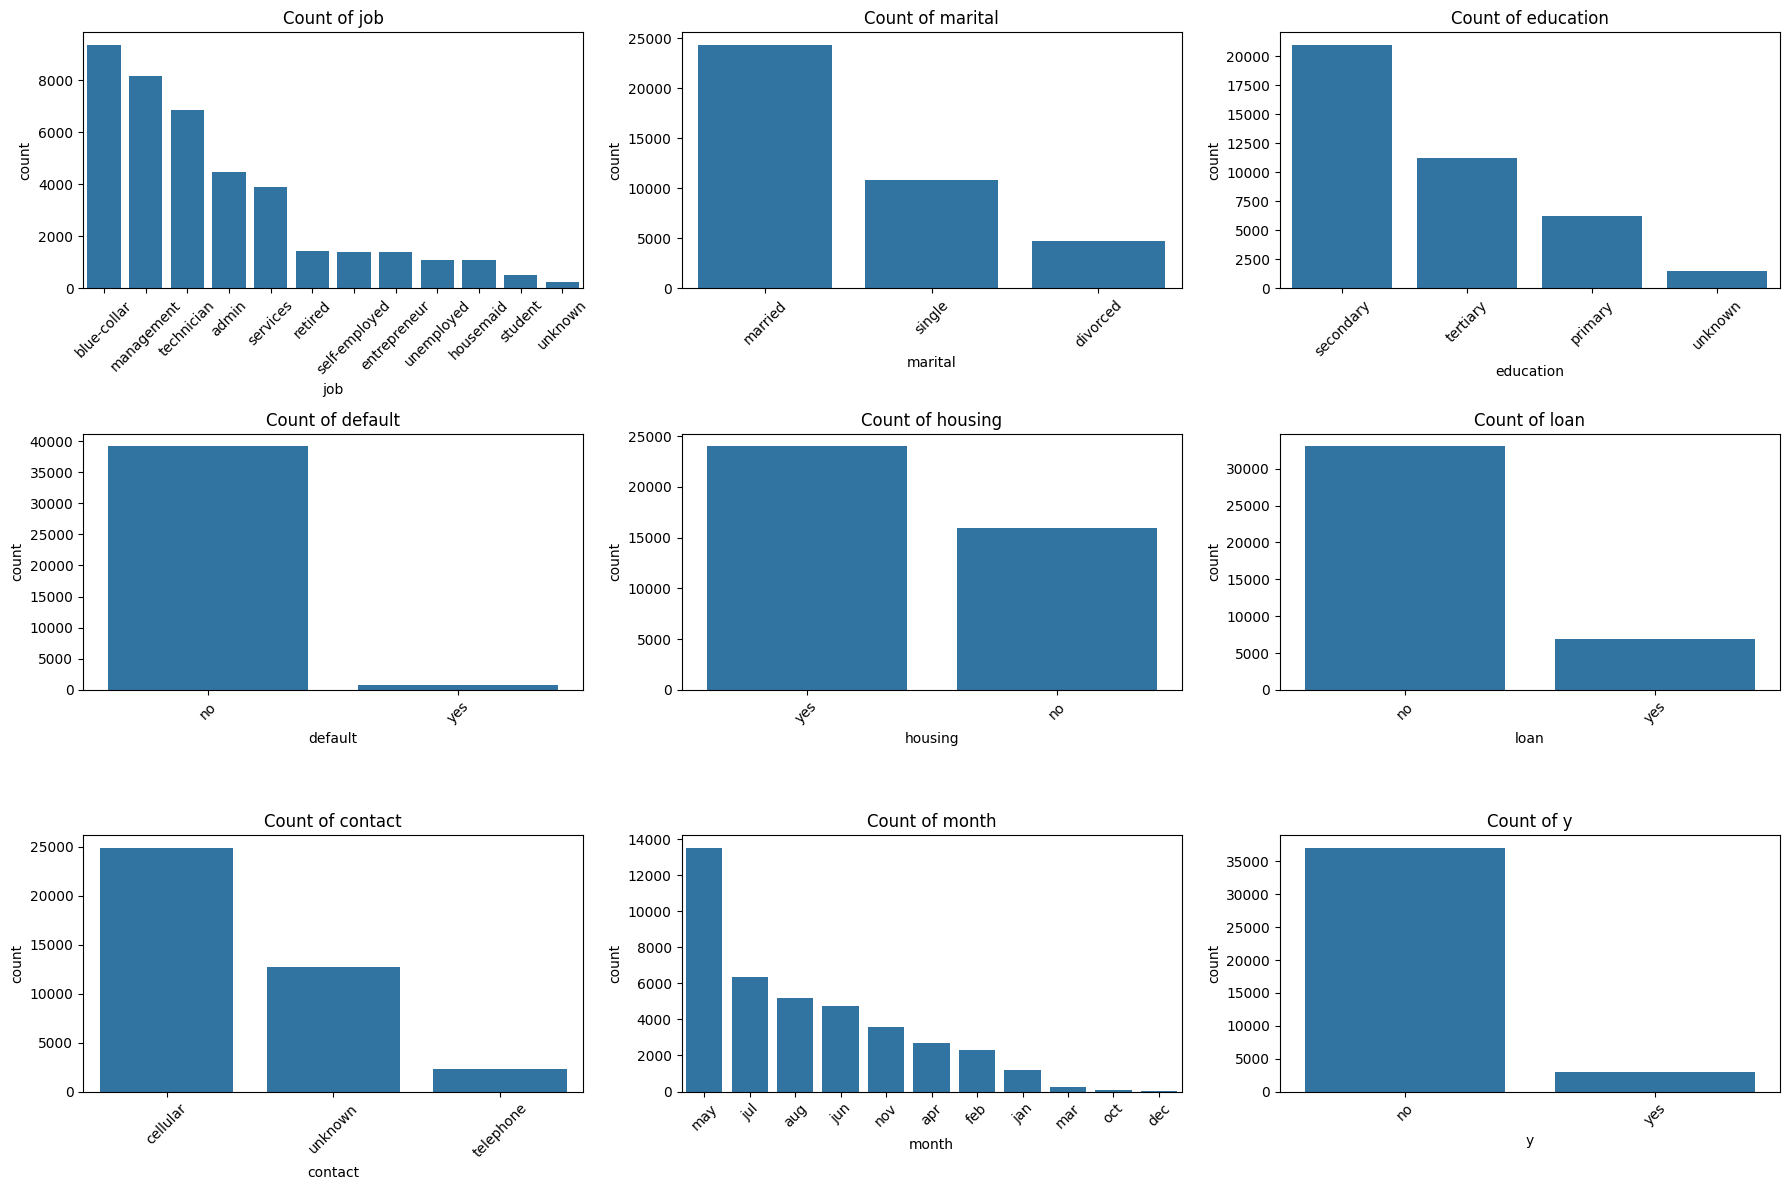

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_features_original.columns):
    sns.countplot(data=categorical_features_original, x=col, ax=axes[idx], order=categorical_features_original[col].value_counts().index)
    axes[idx].set_title(f'Count of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# Separate features and target
X = term_data.drop('y', axis=1)
y = term_data['y'].map({'no': 0, 'yes': 1})  # Convert target to binary

object_col_indices = [i for i, dtype in enumerate(X.dtypes) if dtype == 'object']
print(object_col_indices)

[1, 2, 3, 4, 6, 7, 8, 10]


In [13]:
term_data['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

To create a realistic test scenario, the test data is first separated before using SMOTE to oversample the 'yes' category in this case. This test data will be finally used for evaluation of our model.

In [47]:
from sklearn.model_selection import train_test_split

# Split the reconstructed data and target with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Save the test set for later use
test_data = X_test.copy()
test_data['y'] = y_test.values
test_data.to_csv('term_deposit_test_data.csv', index=False)

In [48]:
test_data['y'].value_counts()

y
0    7421
1     579
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTENC

# For SMOTE, need to convert categorical variables to numeric (one-hot encoding)
X_encoded = pd.get_dummies(X_train)

# Apply SMOTE
smote = SMOTENC(categorical_features = object_col_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)

# Show new class distribution
print(pd.Series(y_resampled).value_counts())

y
0    29683
1    29683
Name: count, dtype: int64


In [50]:
X_resampled.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,40,0,8,232,1,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,44,1678,17,120,1,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,34,6438,21,21,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,33,349,28,62,3,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,32,-34,30,1236,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [51]:
X_resampled.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct'],
      dtype='object')

In [52]:
# Reconstruct original features from one-hot encoded columns in X_resampled

X_reconstructed = X_resampled.copy()

# List of categorical features that were one-hot encoded
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

for feature in categorical_cols:
    prefix = feature + '_'
    dummy_cols = [col for col in X_reconstructed.columns if col.startswith(prefix)]
    if dummy_cols:
        # For binary features (e.g., default, housing, loan), only one dummy column exists (e.g., default_yes)
        if len(dummy_cols) == 2:
            # Reconstruct the original column: if True, set to 'yes', else 'no'
            X_reconstructed[feature] = X_reconstructed[dummy_cols[1]].map({True: 'yes', False: 'no'})
        else:
            # For multi-class features, find which dummy is True for each row
            def get_cat(row):
                for col in dummy_cols:
                    if row[col]:
                        return col.replace(prefix, '')
                return None
            X_reconstructed[feature] = X_reconstructed[dummy_cols].apply(get_cat, axis=1)
        # Drop the dummy columns
        X_reconstructed = X_reconstructed.drop(columns=dummy_cols)

X_reconstructed.head()

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month
0,40,0,8,232,1,management,married,tertiary,no,yes,no,cellular,may
1,44,1678,17,120,1,blue-collar,married,secondary,no,yes,no,unknown,jun
2,34,6438,21,21,7,unemployed,married,secondary,no,yes,no,cellular,nov
3,33,349,28,62,3,management,married,tertiary,no,yes,yes,cellular,jul
4,32,-34,30,1236,2,services,married,secondary,no,yes,no,unknown,may


In [53]:
X_reconstructed['month'].value_counts()

month
may    17236
jul     7600
aug     6394
jun     5363
apr     5019
nov     3660
feb     2901
jan      974
mar      623
oct      156
dec       11
Name: count, dtype: int64

In [54]:
numeric_features = X_reconstructed.select_dtypes(include=[np.number])
categorical_features = X_reconstructed.select_dtypes(exclude=[np.number])

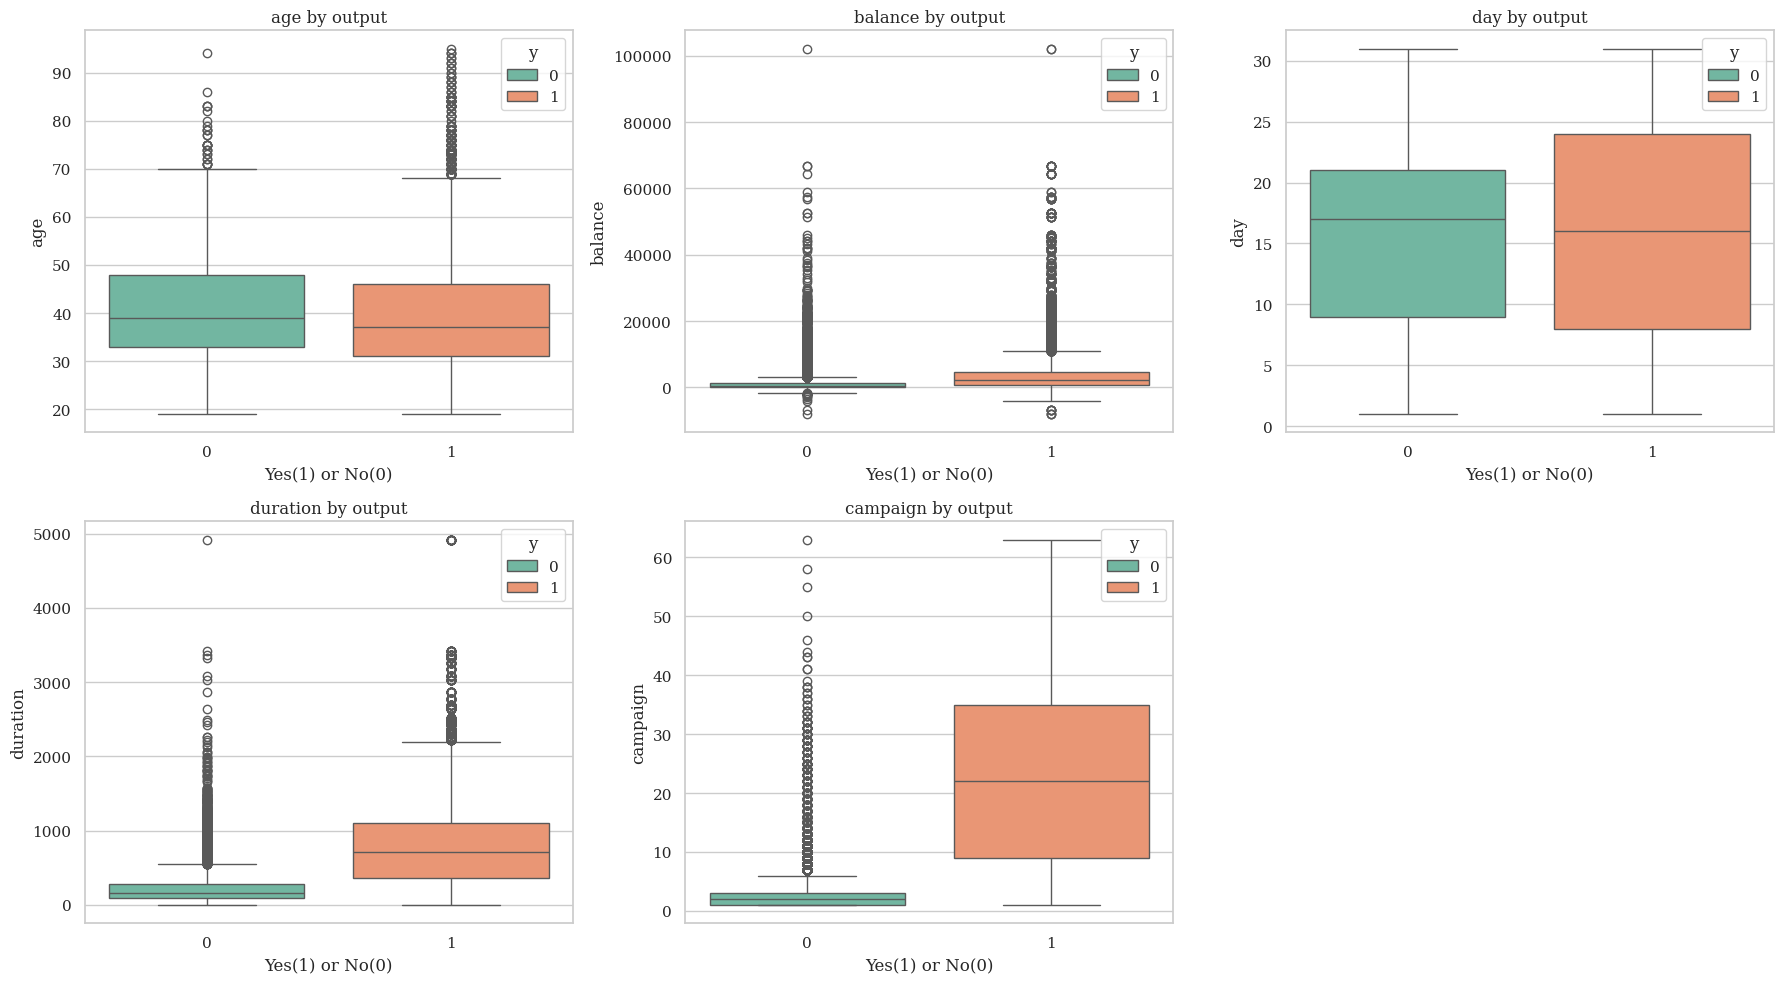

In [55]:
sns.set(style='whitegrid')
plt.rcParams['font.family'] = "serif" 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
numeric_cols = numeric_features.columns

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=y_resampled, 
        y=col, 
        data = X_reconstructed, 
        ax=axes[idx], 
        palette='Set2',
        hue=y_resampled)

    axes[idx].set_title(f'{col} by output')
    axes[idx].set_xlabel('Yes(1) or No(0)')
    axes[idx].set_ylabel(col)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

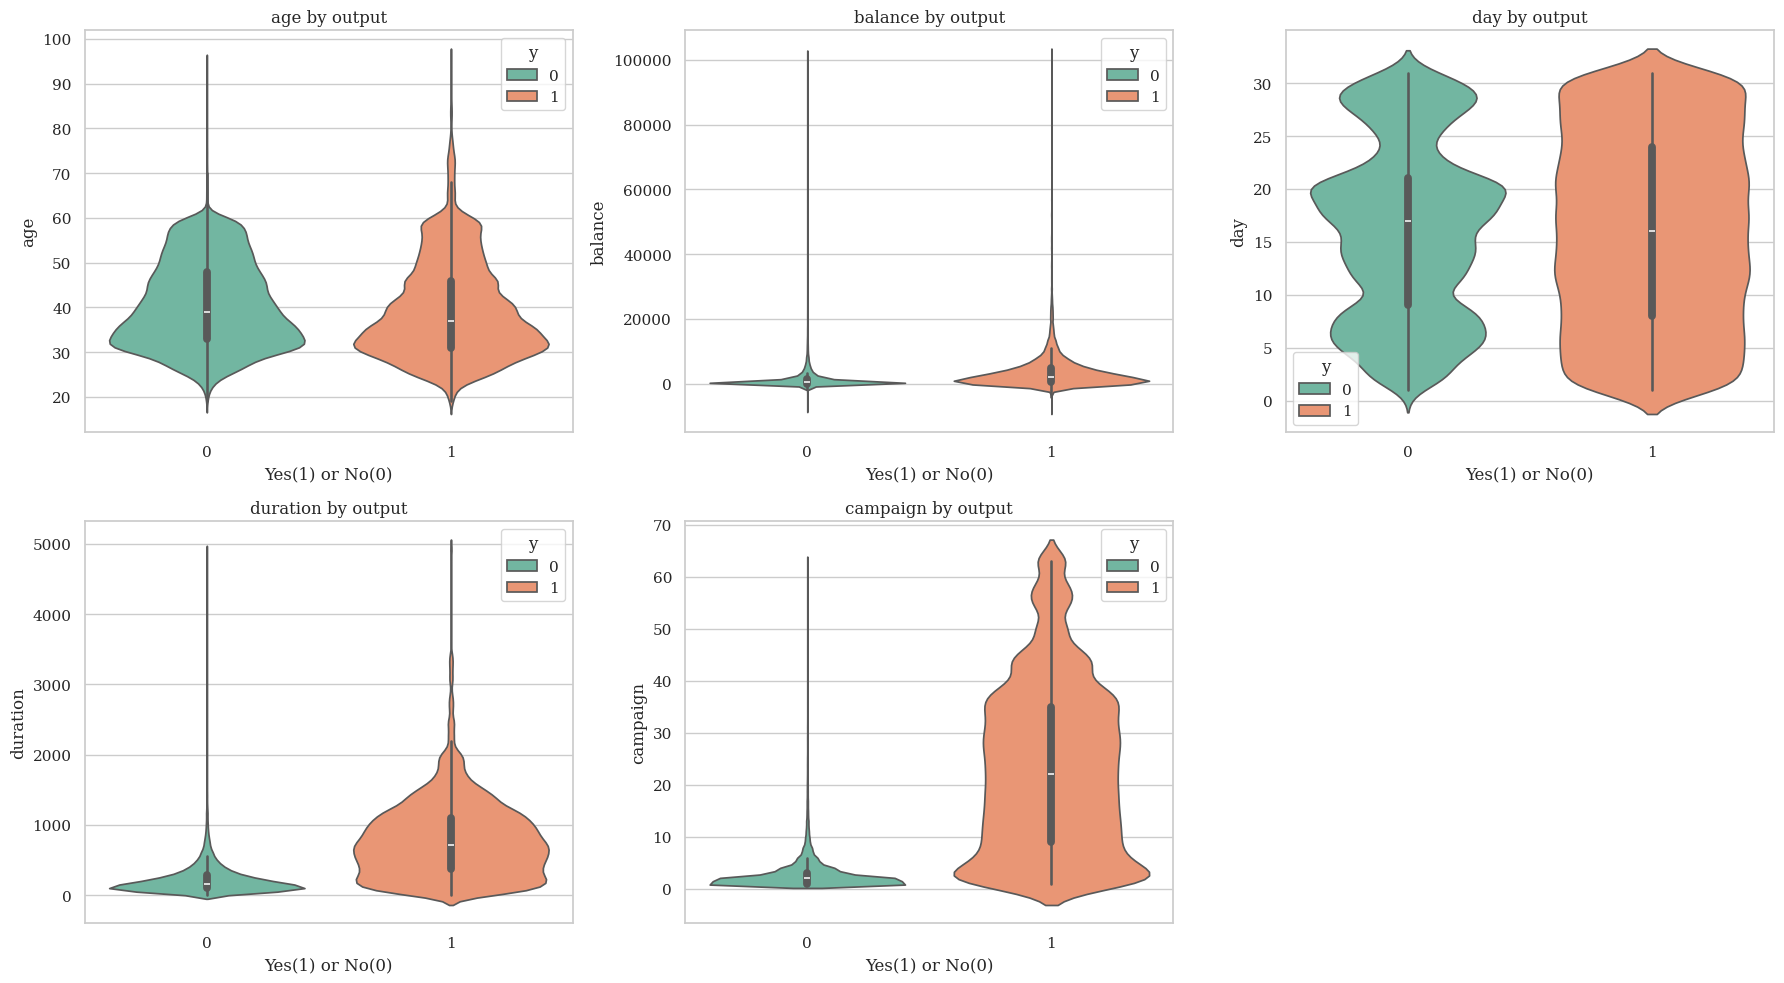

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
numeric_cols = numeric_features.columns

for idx, col in enumerate(numeric_cols):
    sns.violinplot(x=y_resampled, y=col, data = X_reconstructed, ax=axes[idx], palette = 'Set2', inner='box', hue = y_resampled)
    axes[idx].set_title(f'{col} by output')
    axes[idx].set_xlabel('Yes(1) or No(0)')
    axes[idx].set_ylabel(col)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**campaign**, **duration** and **balance** can be important factors in differentitating between the two classes.

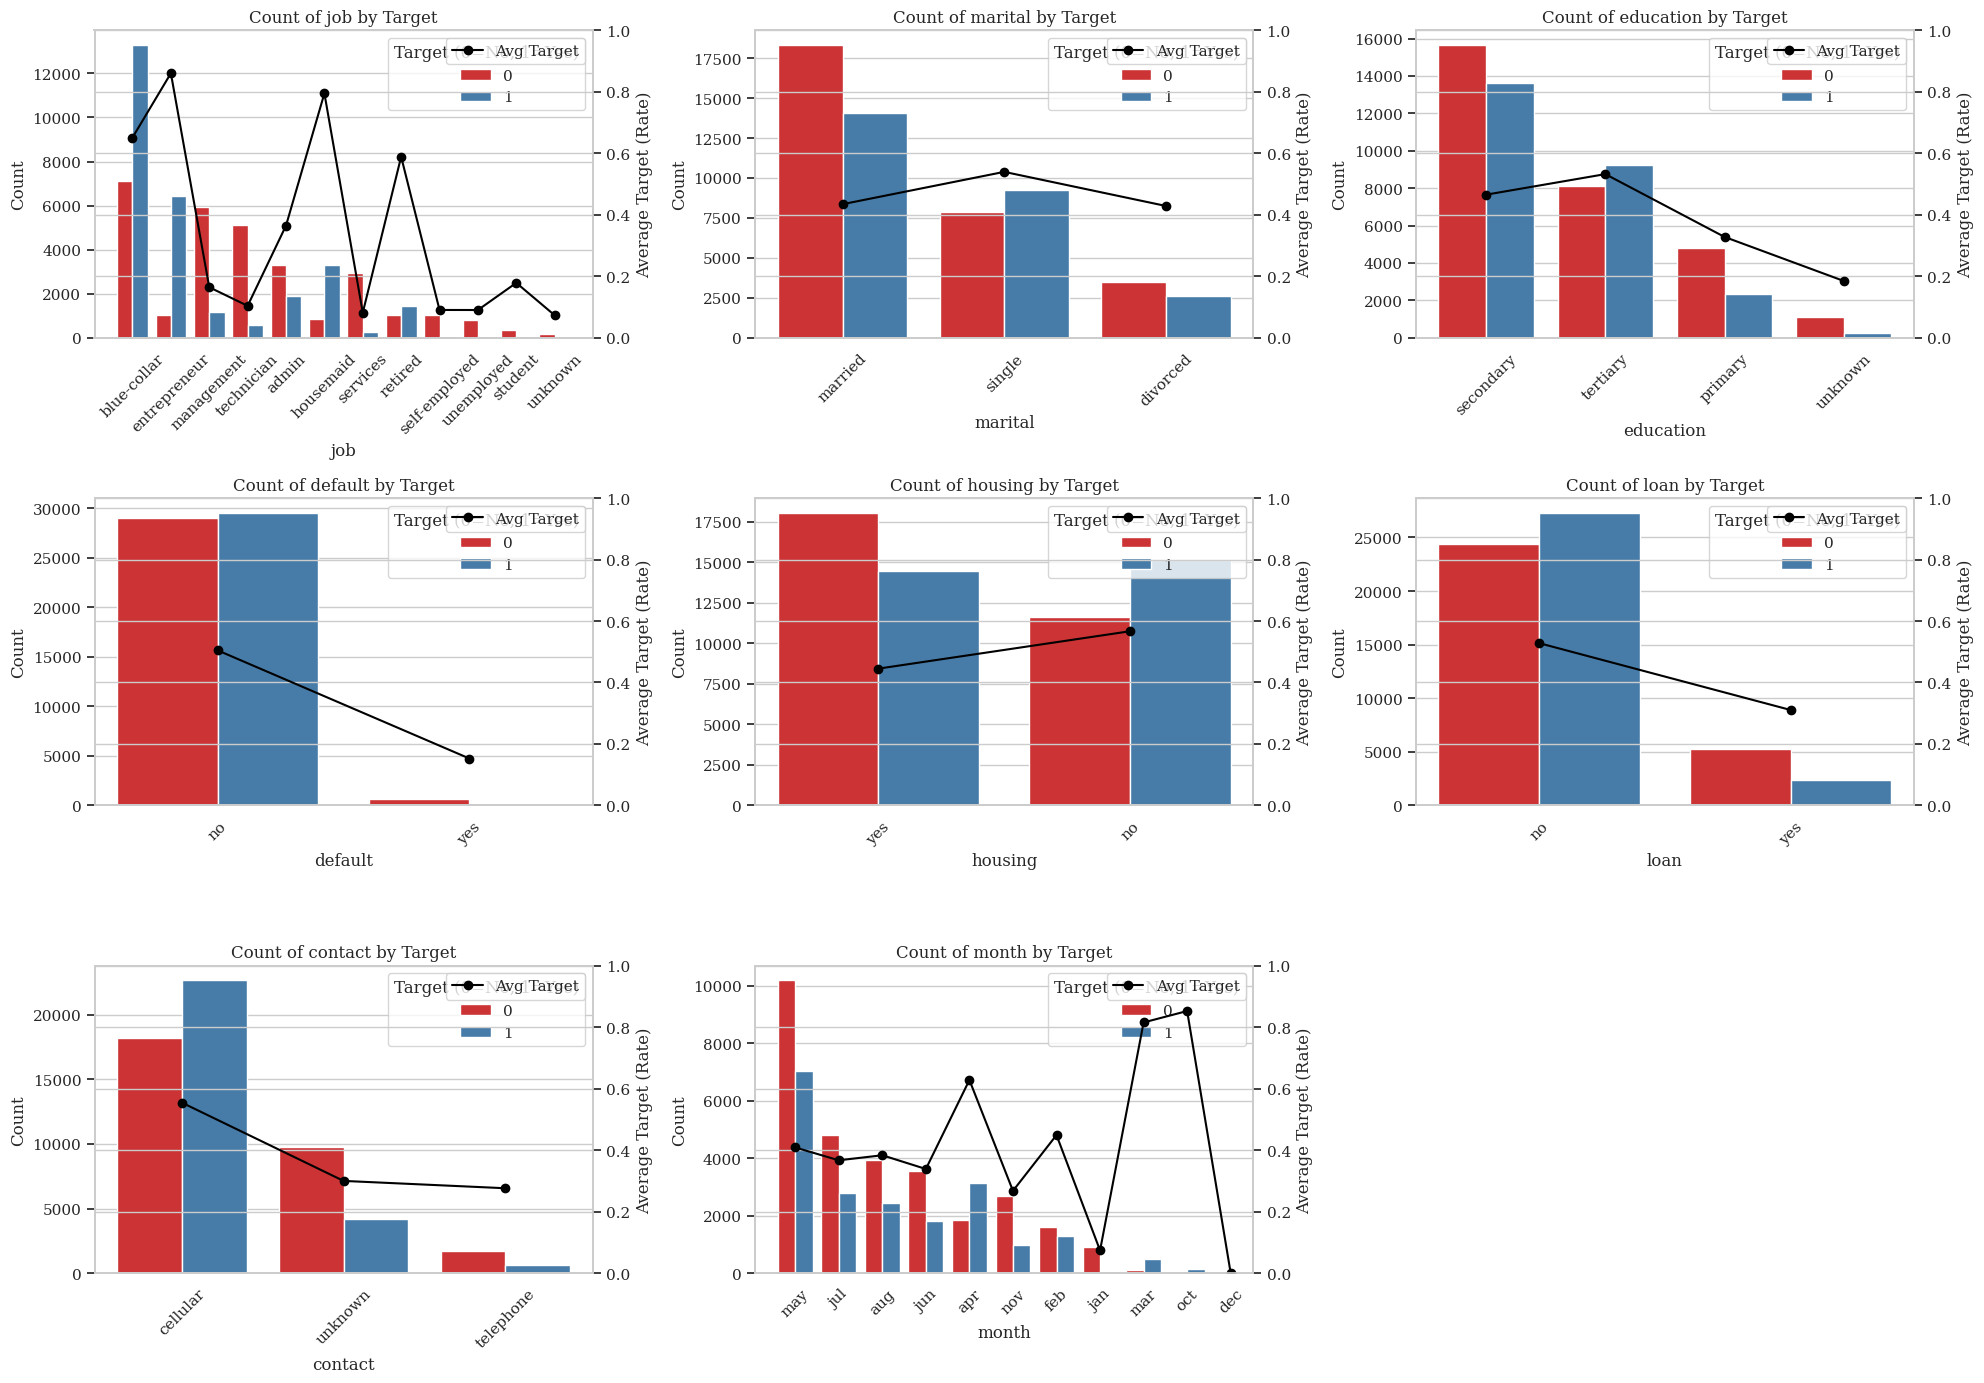

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 14))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    # Countplot (bar)
    sns.countplot(
        data=X_reconstructed,
        x=col,
        hue=y_resampled,
        ax=ax,
        order=X_reconstructed[col].value_counts().index,
        palette='Set1'
    )
    ax.set_title(f'Count of {col} by Target')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Target (0=No, 1=Yes)')

    # Secondary axis: average target value (rate)
    ax2 = ax.twinx()
    avg_target = X_reconstructed.groupby(col).apply(
        lambda g: y_resampled.loc[g.index].mean()
    , include_groups = False).reindex(X_reconstructed[col].value_counts().index)
    ax2.plot(avg_target.index, avg_target.values, color='black', marker='o', linestyle='-', label='Avg Target')
    ax2.set_ylabel('Average Target (Rate)')
    ax2.set_ylim(0, 1)
    ax2.legend(loc='upper right')

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

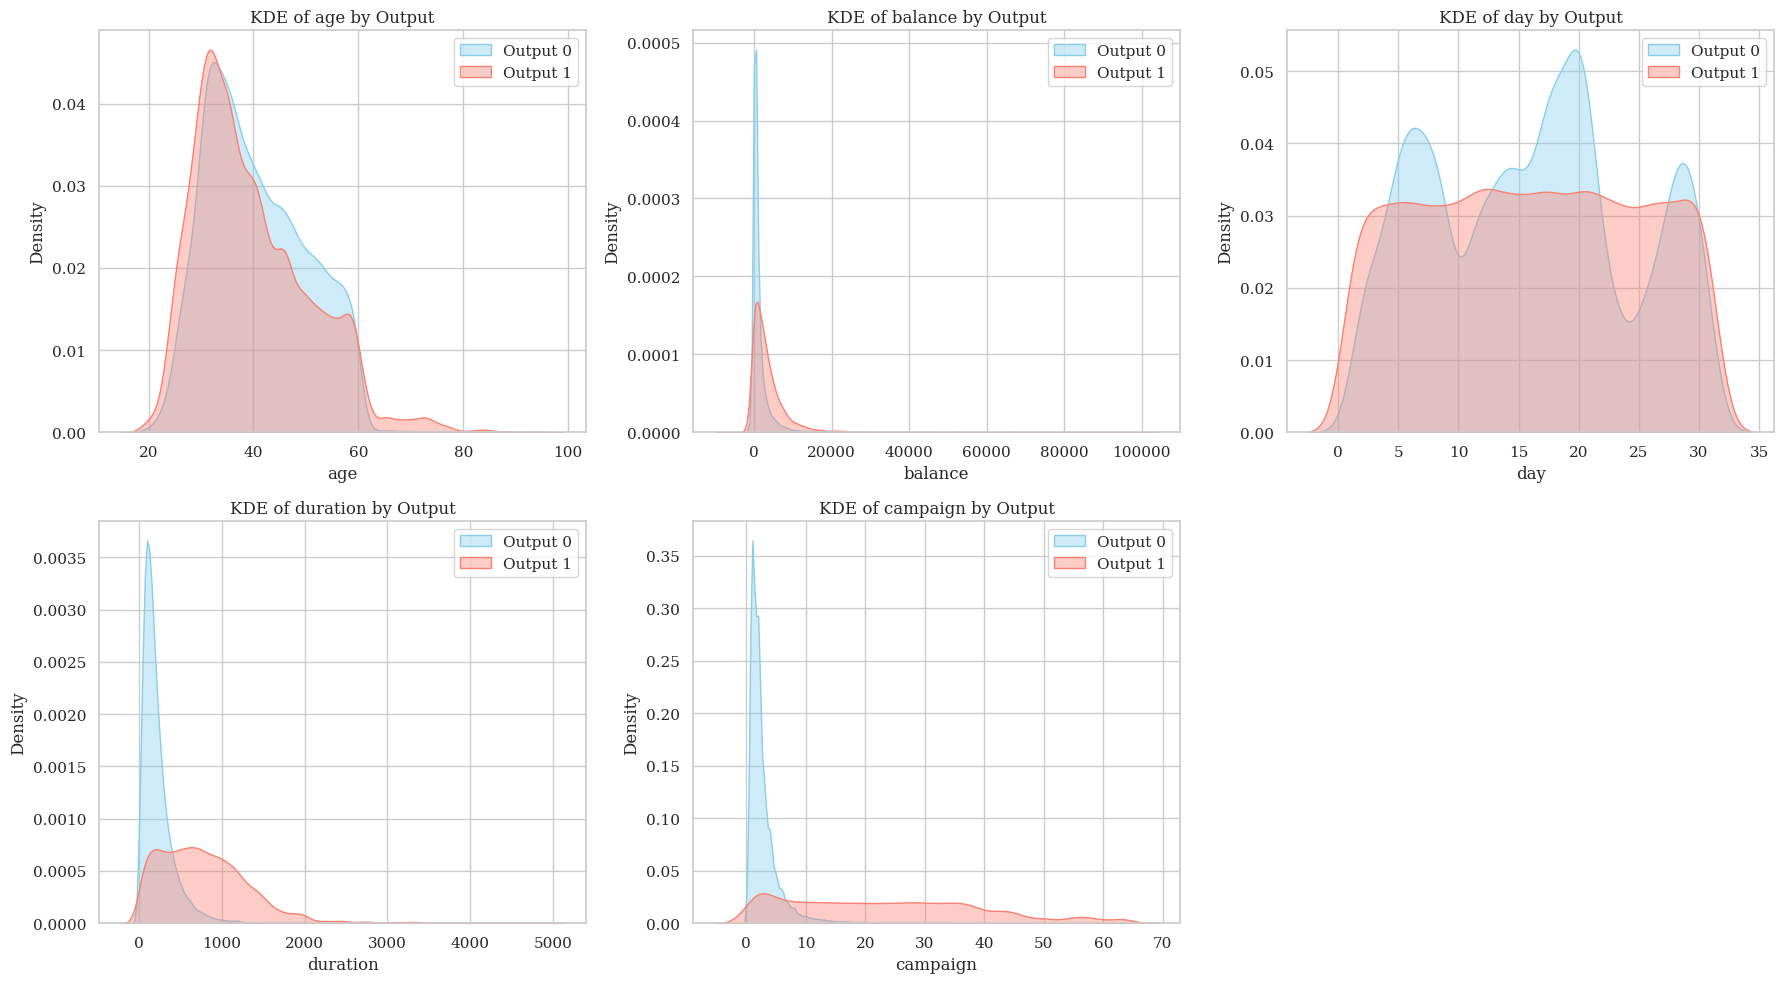

In [58]:
# Plot probability distribution (KDE) for all numeric features in X_reconstructed, split by output label

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
numeric_cols = numeric_features.columns

for idx, col in enumerate(numeric_cols):
    for label, color in zip([0, 1], ['skyblue', 'salmon']):
        sns.kdeplot(
            X_reconstructed[y_resampled == label][col].dropna(),
            ax=axes[idx],
            label=f'Output {label}',
            color=color,
            fill=True,
            alpha=0.4
        )
    axes[idx].set_title(f'KDE of {col} by Output')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

It can be observed that there are matked differences in the output for the **job title**, **education**, **mode of contact**, **loan**, **month**, **housing** can be prominent differentiators in the ML model for predicting the output variable.

In [59]:
merged_df = X_reconstructed.copy()
merged_df['y'] = y_resampled.values
merged_df.head()

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month,y
0,40,0,8,232,1,management,married,tertiary,no,yes,no,cellular,may,0
1,44,1678,17,120,1,blue-collar,married,secondary,no,yes,no,unknown,jun,0
2,34,6438,21,21,7,unemployed,married,secondary,no,yes,no,cellular,nov,0
3,33,349,28,62,3,management,married,tertiary,no,yes,yes,cellular,jul,0
4,32,-34,30,1236,2,services,married,secondary,no,yes,no,unknown,may,1


In [60]:
from scipy.stats import chi2_contingency
import numpy as np

# Correlation between numeric variables and y
numeric_corr = merged_df[numeric_cols.tolist() + ['y']].corr()['y'].drop('y')
print("Correlation between numeric variables and y:")
print(numeric_corr)

# Correlation between categorical variables and y (using Cramér's V)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_corr = {}
for col in categorical_cols:
    if merged_df[col].isnull().any():
        # Drop NA for fair comparison
        valid = merged_df[[col, 'y']].dropna()
        v = cramers_v(valid[col], valid['y'])
    else:
        v = cramers_v(merged_df[col], merged_df['y'])
    categorical_corr[col] = v

print("\nCramér's V between categorical variables and y:")
for col, v in categorical_corr.items():
    print(f"{col}: {v:.3f}")

Correlation between numeric variables and y:
age        -0.043982
balance     0.262942
day         0.000122
duration    0.562038
campaign    0.659463
Name: y, dtype: float64

Cramér's V between categorical variables and y:
job: 0.560
marital: 0.098
education: 0.153
default: 0.077
housing: 0.121
loan: 0.146
contact: 0.233
month: 0.224


* Based on the above exploratory data analysis, we can understand that **age**, **day** and **default** might not be prominent features.
* Furthermore, **balance**, **duration**, **campaign**, **job**, **mode of contact** and **month** can be prominent features in the classification model. 
* **Housing**, **Loan**, **Marital status** and  **Education level** can also be differentiators. 

In [61]:
merged_df.to_csv('merged_term_data_reduced.csv', index=False)